<a href="https://colab.research.google.com/github/pvaluedotone/prophet_forecast/blob/main/AI_in_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI in finance


Saiyidi MAT RONI

*4 Apr 2025*

#1.0 Data

##1.1 Download share price with yFinance



---


Install dependencies

In [18]:
!pip install yfinance



---


Load the dependencies and run the code

In [19]:
import yfinance as yf
import pandas as pd

# Define the stock ticker, start date, and end date
ticker = "JBH.AX"
start_date = "2020-01-01"
end_date = "2025-02-18"

# Download the data
try:
    data = yf.download(ticker, start=start_date, end=end_date)

    # Save the daily close price to a CSV file with the ticker name in the filename
    if not data.empty:
        close_price_data = data[['Close']]
        filename = f"{ticker.replace('.', '_')}_daily_close_prices.csv"  # Replace '.' to avoid file issues
        close_price_data.to_csv(filename)
        print(f"Data successfully downloaded and saved as '{filename}'.")
    else:
        print("No data retrieved. Please check the ticker or date range.")
except Exception as e:
    print(f"An error occurred: {e}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data successfully downloaded and saved as 'JBH_AX_daily_close_prices.csv'.




---


**Check data**

The frequency shows that 2021 the highest number of observation. We will use 2021 data as a cross sectional data for analysis.

In [20]:
import pandas as pd

# Load the uploaded file to check its content
file_path = filename
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()


,Price,Close
0,Ticker,JBH.AX
1,Date,NaN
2,2020-01-02,28.414072036743164
3,2020-01-03,28.54066276550293
4,2020-01-06,28.697032928466797


#2.0 ARIMA and machine learning

##2.1 ARIMA, random forest, neural network, and SVM

It is a common practice in machine learning to split the data into two or three subsets. A typical split is 80-20 for training and test sets, respectively, or 70-20-10 for training, testing, and hold-out samples.

*   Training set: dataset used to train a machine learning model.
*   Testing set: dataset used to test the trained model.
*   Hold-out: this is a dataset which acts like another test set.

**Load a full data**


In [21]:
import pandas as pd

# Load the uploaded file to check its content
file_path = filename
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()


,Price,Close
0,Ticker,JBH.AX
1,Date,NaN
2,2020-01-02,28.414072036743164
3,2020-01-03,28.54066276550293
4,2020-01-06,28.697032928466797




---


**Run prediction**

The following code pre-process the data, and run the following models.


*   ARIMA
*   Neural network
*   Random forest
*   Support vector machine





---
Install dependencies


In [22]:
!pip install tensorflow
!pip install keras
!pip install statsmodels



---
Format the data


In [35]:

def format_columns(file_path):
    # Read the CSV file, automatically detecting header row
    df = pd.read_csv(file_path, skiprows=2, skip_blank_lines=True)

    # Drop fully empty rows if any
    df.dropna(how='all', inplace=True)

    # Rename columns assuming the first column is 'Date' and the second is 'Price'
    df.columns = ['Date', 'Price']
    return df

df = format_columns(file_path)
df.head()

,Date,Price
0,2020-01-02,28.414072
1,2020-01-03,28.540663
2,2020-01-06,28.697033
3,2020-01-07,29.210802
4,2020-01-08,28.667238




---
Save the newly formatted data


In [36]:
df.to_csv('/content/data.csv', index=False)
print('File is saved.')

File is saved.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
         Model   MAE  RMSE
         ARIMA 20.06 24.71
Neural Network 24.92 28.18
 Random Forest 20.16 24.78
           SVM 26.27 30.33





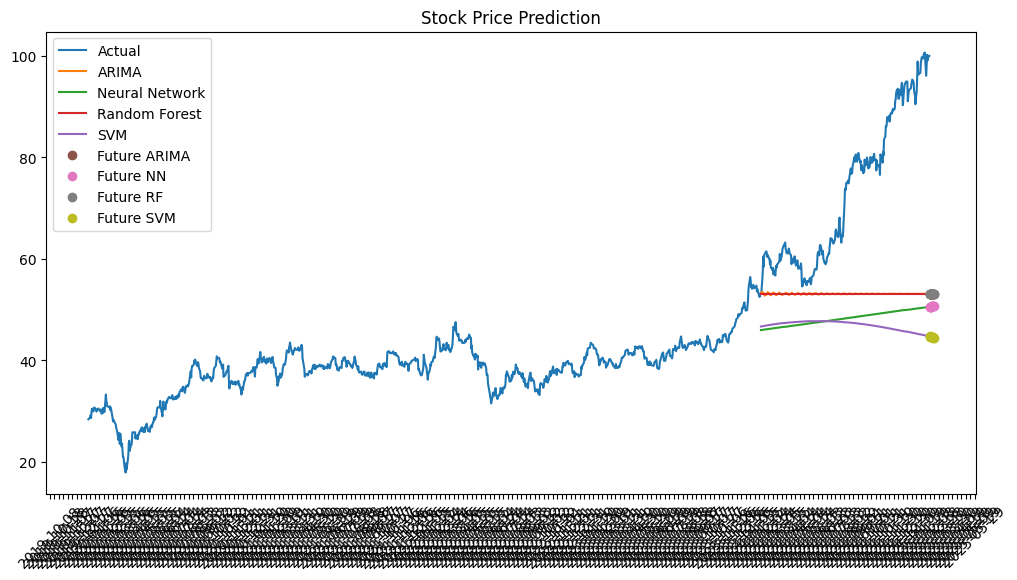

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", errors='coerce')
    df.set_index('Date', inplace=True)  # Set as index
    return df

def split_data(df, test_size):
    train_size = int(len(df) * (1 - test_size))
    train, test = df[:train_size], df[train_size:]
    return train, test

def train_arima(train, test, future_periods):
    model = ARIMA(train, order=(10,1,5))
    model_fit = model.fit()
    pred = model_fit.predict(start=len(train), end=len(train) + len(test) + future_periods - 1, dynamic=False)
    return pred

def train_nn(train, test, future_periods):
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train.values.reshape(-1,1))
    test_scaled = scaler.transform(test.values.reshape(-1,1))

    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(np.arange(len(train_scaled)).reshape(-1,1), train_scaled, epochs=50, verbose=0)

    pred_scaled = model.predict(np.arange(len(train_scaled), len(train_scaled) + len(test) + future_periods).reshape(-1,1))
    pred = scaler.inverse_transform(pred_scaled).flatten()
    return pred

def train_rf(train, test, future_periods):
    model = RandomForestRegressor(n_estimators=100)
    model.fit(np.arange(len(train)).reshape(-1,1), train.values)
    pred = model.predict(np.arange(len(train), len(train) + len(test) + future_periods).reshape(-1,1))
    return pred

def train_svm(train, test, future_periods):
    model = SVR(kernel='rbf')
    model.fit(np.arange(len(train)).reshape(-1,1), train.values)
    pred = model.predict(np.arange(len(train), len(train) + len(test) + future_periods).reshape(-1,1))
    return pred

def plot_results(df, train, test, arima_pred, nn_pred, rf_pred, svm_pred, future_periods):
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df.values, label='Actual')
    plt.plot(test.index, arima_pred[:len(test)], label='ARIMA')
    plt.plot(test.index, nn_pred[:len(test)], label='Neural Network')
    plt.plot(test.index, rf_pred[:len(test)], label='Random Forest')
    plt.plot(test.index, svm_pred[:len(test)], label='SVM')

    future_dates = pd.date_range(start=test.index[-1], periods=future_periods+1, freq='D')[1:]
    plt.plot(future_dates, arima_pred[len(test):], 'o', label='Future ARIMA')
    plt.plot(future_dates, nn_pred[len(test):], 'o', label='Future NN')
    plt.plot(future_dates, rf_pred[len(test):], 'o', label='Future RF')
    plt.plot(future_dates, svm_pred[len(test):], 'o', label='Future SVM')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.legend()
    plt.title("Stock Price Prediction")
    plt.xticks(rotation=45)
    plt.show()

def main():
    file_path = "data.csv"  # Replace with actual file path
    df = load_data(file_path)
    test_size = 0.2  # User-defined
    future_periods = 10  # User-defined

    train, test = split_data(df, test_size)
    arima_pred = train_arima(train, test, future_periods)
    nn_pred = train_nn(train, test, future_periods)
    rf_pred = train_rf(train, test, future_periods)
    svm_pred = train_svm(train, test, future_periods)

    mae_arima, rmse_arima = mean_absolute_error(test, arima_pred[:len(test)]), np.sqrt(mean_squared_error(test, arima_pred[:len(test)]))
    mae_nn, rmse_nn = mean_absolute_error(test, nn_pred[:len(test)]), np.sqrt(mean_squared_error(test, nn_pred[:len(test)]))
    mae_rf, rmse_rf = mean_absolute_error(test, rf_pred[:len(test)]), np.sqrt(mean_squared_error(test, rf_pred[:len(test)]))
    mae_svm, rmse_svm = mean_absolute_error(test, svm_pred[:len(test)]), np.sqrt(mean_squared_error(test, svm_pred[:len(test)]))

    results_df = pd.DataFrame({
        'Model': ['ARIMA', 'Neural Network', 'Random Forest', 'SVM'],
        'MAE': [mae_arima, mae_nn, mae_rf, mae_svm],
        'RMSE': [rmse_arima, rmse_nn, rmse_rf, rmse_svm]
    })
    results_df[['MAE', 'RMSE']] = results_df[['MAE', 'RMSE']].applymap(lambda x: f'{x:.2f}')
    print(results_df.to_string(index=False))
    print('\n\n')

    plot_results(df, train, test, arima_pred, nn_pred, rf_pred, svm_pred, future_periods)

if __name__ == '__main__':
    main()




---

For testing purpose. DO NOT run.

In [39]:
import pandas as pd

# Load the uploaded file to check its content
file_path = filename
data = pd.read_csv(file_path)

# Get the list of column names
column_names = data.columns.tolist()

# Display the column names in a column format
print("Column names:")
for name in column_names:
    print(name)

Column names:
Price
Close


In [ ]:
from sklearn.model_selection import train_test_split

# Adding a new column to identify training and testing sets
data['train_test_split'] = None

# Splitting data for each industry
for industry, group in data.groupby('NAICS Sector Name'):
    train, test = train_test_split(group, test_size=0.2, random_state=42)
    data.loc[train.index, 'train_test_split'] = 1  # Training set
    data.loc[test.index, 'train_test_split'] = 2   # Testing set

# Verifying the split
data['train_test_split'].value_counts(), data.groupby('NAICS Sector Name')['train_test_split'].value_counts()




---
**Save the datasets**



In [ ]:
# Save the updated dataset to a new CSV file
output_file_path = '/content/data_with_train_test_split.csv'
data.to_csv(output_file_path, index=False)

print(f'Data is saved as {output_file_path}')


Data is saved as /content/data_with_train_test_split.csv




---

**One-hot encoding for dummy variables**

We create dummy variables for sector and emission trading.

In [ ]:
import pandas as pd
import numpy as np

# Prepare the dataset for machine learning
file_path = '/content/data_with_train_test_split.csv'
data = pd.read_csv(file_path)
data_split = data.copy()  # To avoid modifying the original data

# Log transform of 'Total Assets' to represent size
data_split['Log_Size'] = np.log(data_split['Total Assets'])

# Handle missing values in 'Emissions Trading' before converting to dummy
# Replace missing values with 'FALSE' (not participating in emissions trading)
data_split['Emissions Trading'] = data_split['Emissions Trading'].fillna('FALSE')

# Convert 'Emissions Trading' to dummy variables
emissions_dummies = pd.get_dummies(data_split['Emissions Trading'], prefix='Emissions_Trading', drop_first=False)

# Handle missing values in 'NAICS Sector Name' (drop rows where this column is missing)
data_split = data_split.dropna(subset=['NAICS Sector Name'])

# Convert 'NAICS Sector Name' to dummy variables
sector_dummies = pd.get_dummies(data_split['NAICS Sector Name'], prefix='Sector', drop_first=True)

# Combine the original data with the dummy variables
ml_data = pd.concat([
    data_split[['Firm','Exchange','Year','NAICS Sector Name','Net Profit Margin', 'emission_rev', 'Current Ratio', 'zscore', 'ESG Combined Score',
                'Log_Size', 'Interest Coverage Ratio', 'Debt to Equity', 'Debt to Total Assets ','train_test_split']],
    emissions_dummies,  # Add the emissions trading dummy columns
    sector_dummies  # Add the sector dummy columns
], axis=1)

# Print the resulting dataset shape
print("Processed dataset shape:", ml_data.shape)


In [ ]:
# Display the final dataset summary
ml_data.describe()

In [ ]:
# Save the combined dataset to a CSV file
output_file_path = '/content/combined_data.csv'  # Specify your desired output file path
ml_data.to_csv(output_file_path, index=False)  # Save the dataframe as a CSV without the index column

print(f"Dataset saved to {output_file_path}")

End of test window.

---



#3.0 Regression

##3.1 OLS for cross-sectional data

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Prepare the dataset for regression
file_path = '/content/2021_dataset.csv'
data = pd.read_csv(file_path)
data_2021 = data

# Log transform of 'Total Assets' to represent size
data_2021['Log_Size'] = np.log(data_2021['Total Assets'])

# Convert 'Emissions Trading' to dummy variable (1=True, 0=False)
data_2021['Emissions_Trading_Dummy'] = data_2021['Emissions Trading'].astype(int)

# Convert 'NAICS Sector Name' to dummy variables and ensure they are integers
sector_dummies = pd.get_dummies(data_2021['NAICS Sector Name'], prefix='Sector', drop_first=True).astype(int)


# Combine the data
regression_data = pd.concat([
    data_2021[['Net Profit Margin', 'emission_rev', 'Current Ratio', 'zscore', 'ESG Combined Score',
               'Log_Size', 'Emissions_Trading_Dummy']],
    sector_dummies,
    data_2021[['Interest Coverage Ratio', 'Debt to Equity', 'Debt to Total Assets ']]
], axis=1).dropna()  # Drop rows with missing values

# Define outcome and predictors
X = regression_data.drop(columns=['Net Profit Margin'])
y = regression_data['Net Profit Margin']

# Add constant to predictors
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression results summary
model_summary = model.summary()
model_summary




---


**Check for multicollinearity based on variance inflation factor (VIF)**

VIF =< 3.3 is considered ideal (Mat Roni & Djajadikerta, 2021), although VIF of 5 is still acceptable.

Mat Roni, S., & Djajadikerta, H. G. (2021). Data analysis with SPSS for survey-based research. Singapore: Springer.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate Variance Inflation Factor (VIF) for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("Variance Inflation Factor (VIF) Analysis")
print(vif_data)




---

**Autocorrelation**

Check for autocorrelation or also called serial correlation.


An autocorrelation arises when the residuals (errors) of the model are correlated with one another, which violates the assumption of independence in the classical ordinary least squares (OLS) regression.

Autocorrelation typically does not affect the regression coefficient. However, it can bias the standard error resulting in an unreliable *p*-value. A positive autocorrelation increases Type I (false positive), while a negative autocorrelation increases Type II (false negative) error.

A common way to detect an autocorrelation is Durbin-Watson (DW) test. DW has a value from 0 to 4. A value closer to 2 indicates there is no autocorrelation.


*   DW=2: No autocorrelation.
*   DW<2: Positive autocorrelation.
*   DW>2: Negative autocorrelation.
*   DW=0: Perfect positive autocorrelation.
*   DW=4: Perfect negative autocorrelation.


> In the result, the Durbin-Watson statistic for the regression model is approximately 2.25, which is close to the ideal value of 2.Values near 2 indicate no significant autocorrelation in the residuals.
Values significantly below 2 suggest positive autocorrelation, while values above 2 suggest negative autocorrelation.



In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson statistic for the regression model
dw_statistic = durbin_watson(model.resid)

# Display the Durbin-Watson statistic
dw_statistic




---
**Residual plot**

We use use a residual plot to check for normality of the error.



> In the result,


*   Histogram: the residuals have some deviation from a normal distribution, with high skewness (heavy tails).
*   QQ-Plot: the points deviate from the reference line, particularly at the tails, indicating that the residuals violates a normal distribution.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Extract residuals
residuals = model.resid

# Plot histogram and QQ-plot of residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals', fontsize=14)

plt.tight_layout()
plt.show()


##3.2 Fixed effect model

##3.3 Random effect model

#4.0 Prophet

##4.1 Data and prediction



---
Install dependencies and download sample data

A larger sample data can be downloaded from here.



> df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')


> df.head()






In [41]:
!pip install prophet

In [73]:
import pandas as pd
from prophet import Prophet

# Load CSV
df = pd.read_csv('/content/data.csv')

# Rename columns
df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Convert 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'], format="%Y-%m-%d", errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['ds'], inplace=True)

# Prophet model
m = Prophet()
m.fit(df)  # Fit model

# Generate future dates
future = m.make_future_dataframe(periods=365)
#print(future.tail())  # Display last few rows of future dataframe
future.tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/v2cga_i9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/z8bbkid6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34323', 'data', 'file=/tmp/tmpy4iu2n9h/v2cga_i9.json', 'init=/tmp/tmpy4iu2n9h/z8bbkid6.json', 'output', 'file=/tmp/tmpy4iu2n9h/prophet_model6_amrviv/prophet_model-20250403085508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
1658,2026-02-13
1659,2026-02-14
1660,2026-02-15
1661,2026-02-16
1662,2026-02-17




---

Prediction



---
Prediction


In [60]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1658,2026-02-13,143.453165,126.415584,157.956883
1659,2026-02-14,145.342530,128.614553,160.389691
1660,2026-02-15,145.448668,128.001067,160.394085
1661,2026-02-16,143.750489,126.472714,158.430976
1662,2026-02-17,143.913531,126.498668,158.158241




---

Plot the prediction

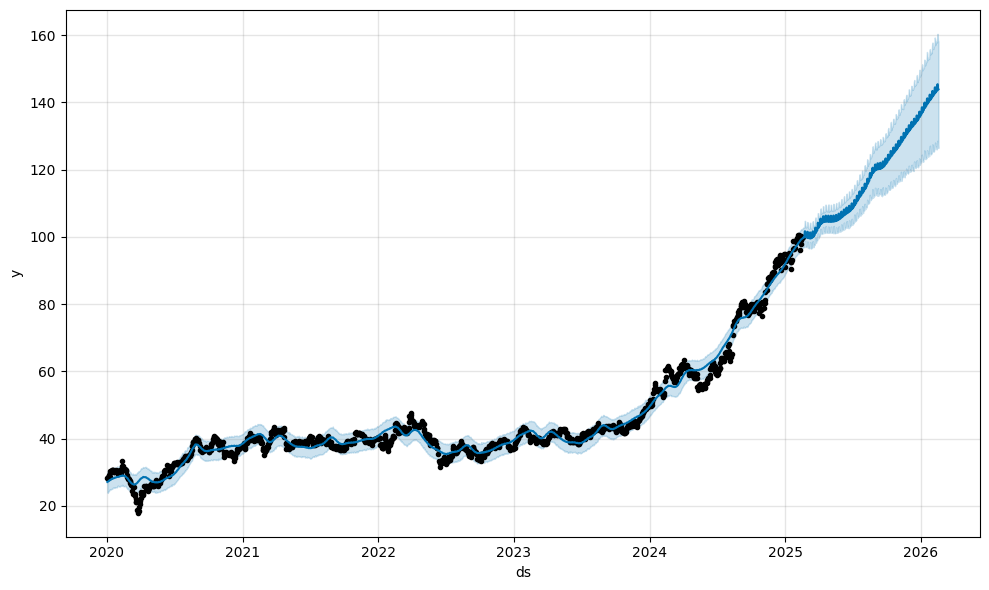

In [61]:
fig1 = m.plot(forecast)



---

Plot prediction components

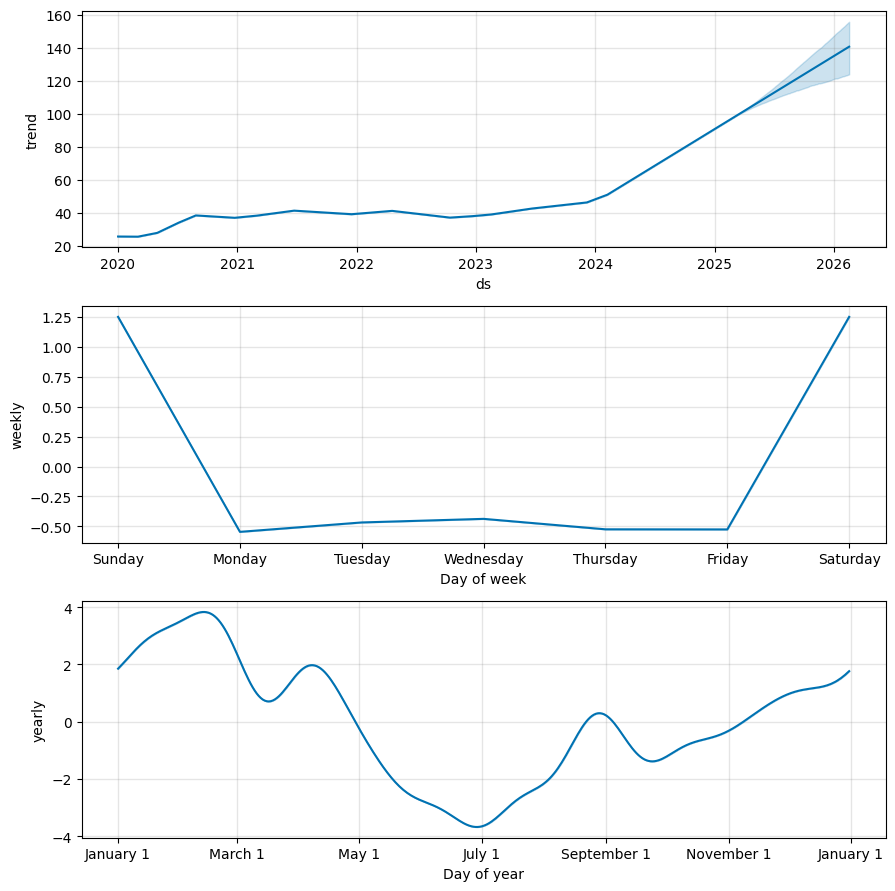

In [62]:
fig2 = m.plot_components(forecast)



---
Interactive prediction components


In [63]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)



---
Interactive component


In [64]:
plot_components_plotly(m, forecast)



---
Cross validation


In [65]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

df_cv.head()



INFO:prophet:Making 5 forecasts with cutoffs between 2022-02-28 00:00:00 and 2024-02-18 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/8qk783mf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/c_usb3fw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9751', 'data', 'file=/tmp/tmpy4iu2n9h/8qk783mf.json', 'init=/tmp/tmpy4iu2n9h/c_usb3fw.json', 'output', 'file=/tmp/tmpy4iu2n9h/prophet_model6wwv4wo1/prophet_model-20250403083134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:31:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:31:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/gmqaxhmv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/1mm71xar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-01,40.787544,38.889167,42.634283,42.576412,2022-02-28
1,2022-03-02,40.730553,38.934388,42.721419,42.721146,2022-02-28
2,2022-03-03,40.444104,38.417218,42.451769,43.206425,2022-02-28
3,2022-03-04,40.251986,38.462122,42.259099,42.159252,2022-02-28
4,2022-03-07,39.810524,37.789603,41.758453,42.372089,2022-02-28




---
Custom cut-off dates and performance metrics


In [68]:
from prophet.diagnostics import performance_metrics

cutoffs = pd.to_datetime(['2023-02-15', '2023-08-31', '2022-01-31'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

df_p = performance_metrics(df_cv)
df_p.head()

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/9eqkqi4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/a35a6h3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94454', 'data', 'file=/tmp/tmpy4iu2n9h/9eqkqi4b.json', 'init=/tmp/tmpy4iu2n9h/a35a6h3q.json', 'output', 'file=/tmp/tmpy4iu2n9h/prophet_model0nlyrt_j/prophet_model-20250403083447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:34:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/l4umgz1j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/o266v0un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,14.018757,3.744163,3.140119,0.066892,0.071128,0.069221,0.361111
1,37 days,14.043681,3.747490,3.158861,0.067337,0.071128,0.069686,0.345238
2,38 days,14.109964,3.756323,3.181538,0.067886,0.071128,0.070253,0.341270
3,39 days,14.277466,3.778553,3.210978,0.068572,0.071128,0.070936,0.337302
4,40 days,14.154536,3.762251,3.204469,0.068674,0.071128,0.071004,0.333333




---
Visualising performance metrics

We use MAE metric in this illustration.


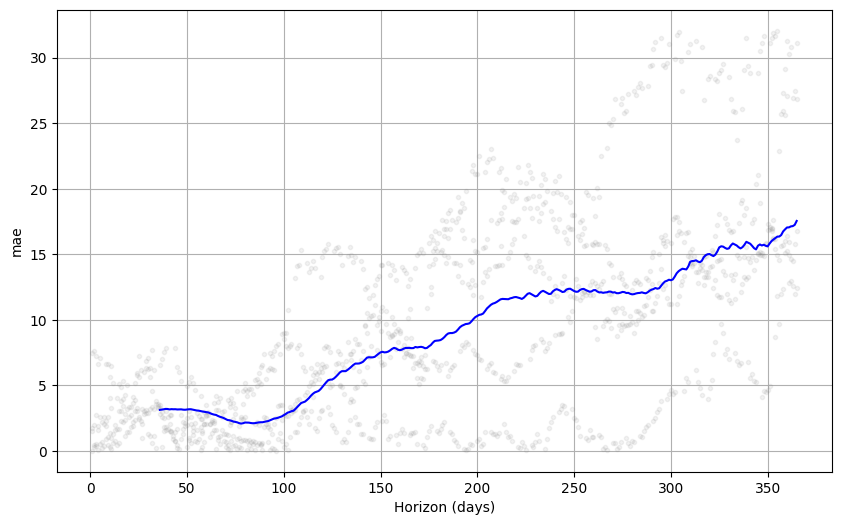

In [69]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mae')

##4.2 Hyperparameter tuning



---

This hyperparameter tuning uses RMSE as the performance metric.

In [70]:
import itertools
import numpy as np
import pandas as pd

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0]) # Change rmse to other performance metric such as 'mae' for 'mean absolute error' if needed.

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses # Change rmse to other performance metric such as 'mae' for 'mean absolute error' if needed.
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/cgpa18fv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4iu2n9h/zmkifn9_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54848', 'data', 'file=/tmp/tmpy4iu2n9h/cgpa18fv.json', 'init=/tmp/tmpy4iu2n9h/zmkifn9_.json', 'output', 'file=/tmp/tmpy4iu2n9h/prophet_model_ga7q435/prophet_model-20250403083512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:35:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x789af5410810>
DEBUG:cmdstanpy:input tempfil

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  2.580797
1                     0.001                     0.10  2.701525
2                     0.001                     1.00  2.692068
3                     0.001                    10.00  2.683279
4                     0.010                     0.01  3.175324
5                     0.010                     0.10  3.322694
6                     0.010                     1.00  3.343786
7                     0.010                    10.00  3.359370
8                     0.100                     0.01  3.063486
9                     0.100                     0.10  3.539205
10                    0.100                     1.00  3.514868
11                    0.100                    10.00  3.473470
12                    0.500                     0.01  3.811394
13                    0.500                     0.10  4.988587
14                    0.500                     1.00  5

In [71]:
#Print best parameters
best_params = all_params[np.argmin(rmses)] # Change 'rmses' to your specific metric defined in the previous cell.
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}
